In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set()

In [2]:
raw_data = pd.read_csv("Admission Test.csv")
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [3]:
data = raw_data.copy()

In [4]:
data["Attendance"] = data["Attendance"].map({"Yes":1,"No":0})

In [5]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [6]:
# Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
data.columns

Index(['SAT', 'GPA', 'Attendance'], dtype='object')

In [8]:
y = data["GPA"]
x1 = data[['SAT', 'Attendance']]

In [9]:
model = LinearRegression()
model.fit(x1,y)

LinearRegression()

In [10]:
print(f"Coefficients: {model.coef_}")
print(f"Intercepts: {model.intercept_}")

Coefficients: [0.0013998  0.22264409]
Intercepts: 0.6438504592803018


y = b0 + b1x1 + b2x2

In [11]:
0.6438504592803023 + (0.0013998*1500) + (0.22264409*1)

2.966194549280303

In [12]:
data.corr()["GPA"]

SAT           0.637184
GPA           1.000000
Attendance    0.540253
Name: GPA, dtype: float64

In [13]:
yhat_no = 0.0013998*data["SAT"] + 0.6438504592803023
yhat_yes = 0.0013998*data["SAT"] + (0.6438504592803023+0.22264409)

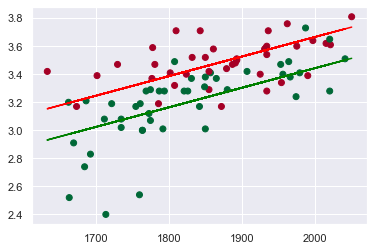

In [14]:
plt.scatter(data["SAT"],y, c=data["Attendance"], cmap = "RdYlGn_r")
fig = plt.plot(data["SAT"],yhat_no, c = "green")
fig = plt.plot(data["SAT"],yhat_yes, c = "red")

In [15]:
model.score(x1,y)

0.5654390486739878

In [16]:
y = data["GPA"]
x1 = data[['SAT']]

In [17]:
model = LinearRegression()
model.fit(x1,y)
model.score(x1,y)

0.40600391479679765

In [18]:
print(f"Coefficients: {model.coef_}")
print(f"Intercepts: {model.intercept_}")

Coefficients: [0.00165569]
Intercepts: 0.2750402996602803


In [19]:
yhat_no = 0.0013998*data["SAT"] + 0.6438504592803023
yhat_yes = 0.0013998*data["SAT"] + (0.6438504592803023+0.22264409)
yhat = 0.2750402996602803 + 0.00165569*data["SAT"]

yhat

0     3.112893
1     3.030108
2     3.189055
3     3.064878
4     3.078123
        ...   
79    3.480456
80    3.271839
81    3.564896
82    3.523504
83    3.669205
Name: SAT, Length: 84, dtype: float64

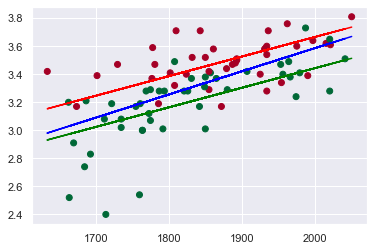

In [20]:
plt.scatter(data["SAT"],y, c=data["Attendance"], cmap = "RdYlGn_r")
fig = plt.plot(data["SAT"],yhat_no, c = "green")
fig = plt.plot(data["SAT"],yhat_yes, c = "red")
fig = plt.plot(data["SAT"],yhat, c = "blue")